<a href="https://colab.research.google.com/github/vermanaman419-prog/Naman/blob/main/Clothing_Brand_Analysis_ZARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading data

In [2]:
df = pd.read_csv("Zara_sales_EDA - Zara_sales_EDA.csv")


checking Data

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle       Yes         clothing      Yes   
1      188771            Aisle       Yes         clothing       No   
2      180176          End-cap       Yes         clothing      Yes   
3      112917            Aisle       Yes         clothing       No   
4      192936          End-cap       Yes         clothing      Yes   

   Sales Volume brand                                                url  \
0          1243  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1          1429  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          1168  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1348  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          1602  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                   name                                        description  \
0   BASIC PUFFER JACKET  Puffer jacket made 

Data Cleaning

Check for missing values

In [4]:
print(df.isnull().sum())


Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64


Filling missing data

In [6]:
df = df.fillna('Unknown')

Remove duplicates

In [7]:
df = df.drop_duplicates()

Basic EDA

Check unique values

In [12]:
print(df['name'].nunique())
print(df['origin'].unique())
print(df['section'].value_counts())

17216
['Brazil' 'Turkey' 'Morocco' 'China' 'Portugal' 'India' 'Bangladesh'
 'Vietnam' 'Spain' 'Cambodia' 'Argentina' 'Pakistan']
section
WOMAN    13254
MAN       6998
Name: count, dtype: int64


Visualizations

Visualization 1 — Top 5 Best Products (With and Without Promotions)

/tmp/ipython-input-3462892416.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=top5_promo.values, y=top5_promo.index, palette='Blues_r')
/tmp/ipython-input-3462892416.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top5_nonpromo.values, y=top5_nonpromo.index, palette='Greens_r')


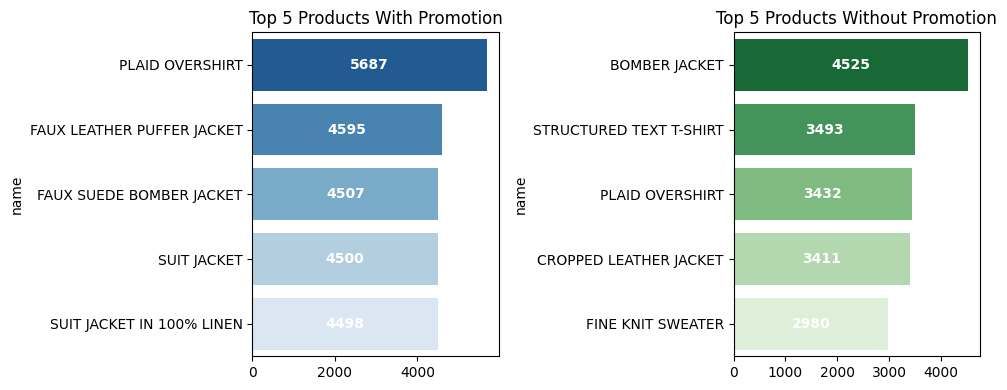

In [17]:
#With promotions
top5_promo = (df[df['Promotion'] == 'Yes']
              .groupby('name')['Sales Volume']
              .sum()
              .sort_values(ascending=False)
              .head(5))

#Without promotions
top5_nonpromo = (df[df['Promotion'] == 'No']
                 .groupby('name')['Sales Volume']
                 .sum()
                 .sort_values(ascending=False)
                 .head(5))

#Plot setup
plt.figure(figsize=(10,4))

#Left subplot: With Promotion
plt.subplot(1,2,1)
ax1 = sns.barplot(x=top5_promo.values, y=top5_promo.index, palette='Blues_r')
plt.title('Top 5 Products With Promotion')

#Add labels inside bars
for i, v in enumerate(top5_promo.values):
    ax1.text(v/2, i, f'{int(v)}', color='white', fontweight='bold', ha='center', va='center')

#Right subplot: Without Promotion
plt.subplot(1,2,2)
ax2 = sns.barplot(x=top5_nonpromo.values, y=top5_nonpromo.index, palette='Greens_r')
plt.title('Top 5 Products Without Promotion')

#Add labels inside bars
for i, v in enumerate(top5_nonpromo.values):
    ax2.text(v/2, i, f'{int(v)}', color='white', fontweight='bold', ha='center', va='center')

plt.tight_layout()
plt.show()


Visualization 2 — Best Performing Country

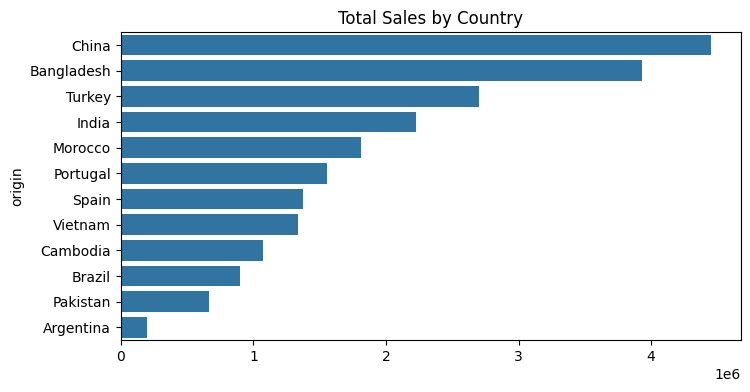

In [19]:
country_sales = df.groupby('origin')['Sales Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Total Sales by Country')
plt.show()


Visualization 3 — Least Sold Products & Promotion Check

In [22]:
least5 = df.groupby(['name','Promotion'])['Sales Volume'].sum().sort_values().head(5)
print(least5)


name                                                                Promotion
DOUBLE-BREASTED FAUX LEATHER OVERSIZED JACKET LIMITED EDITION GREY  No           518
SLIM TEXTURED JACKET WHITE                                          No           528
STRETCH JACQUARD DENIM JACKET STONE                                 No           533
BELTED ACID WASH DENIM JACKET                                       No           534
PLEATED TEXTURED WEAVE OVERSHIRT CHARCOAL                           No           539
Name: Sales Volume, dtype: int64


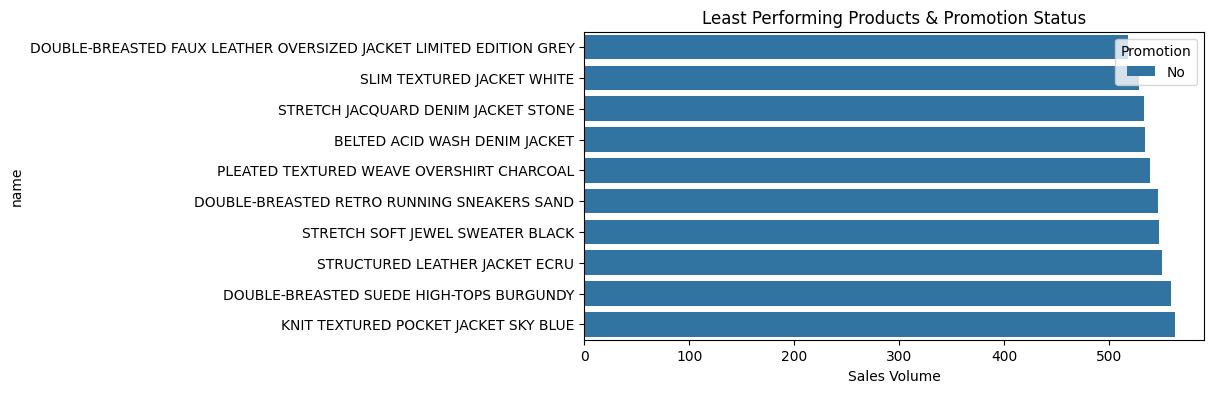

In [25]:
least_df = df.groupby(['name','Promotion'])['Sales Volume'].sum().sort_values().head(10).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=least_df, x='Sales Volume', y='name', hue='Promotion')
plt.title('Least Performing Products & Promotion Status')
plt.show()

Visualization 4 — Most Demanded Material

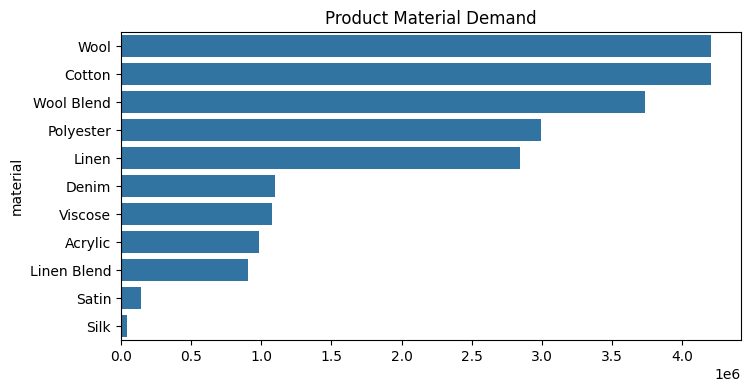

In [28]:
material_sales = df.groupby('material')['Sales Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=material_sales.values, y=material_sales.index)
plt.title('Product Material Demand')
plt.show()

Visualization 5 — Sales by Gender

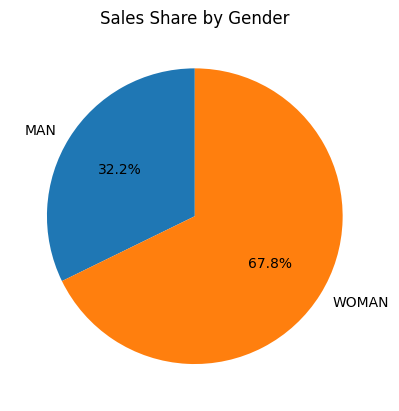

In [31]:
gender_sales = df.groupby('section')['Sales Volume'].sum()

plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Share by Gender')
plt.show()